<a href="https://colab.research.google.com/github/ali1810/Solubility_predition_feature/blob/main/Solubility_delaney_datset_rf_xg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
sol = pd.read_csv('Dataset/delaney.csv')
sol

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [5]:
sol["smiles_length"]= sol["SMILES"].apply(len)

In [6]:
max_lenghth=max(sol["smiles_length"])
max_lenghth

98

In [7]:
#smiles_length = dataset["SMILES"],key =len
#print(smiles_length)
#sol  = sol[sol['smiles_length'] < 100]

In [8]:
sol.SMILES

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

In [9]:
!pip install -q condacolab
import condacolab
condacolab.install()

You should consider upgrading via the '/home/pascal/anaconda3/bin/python -m pip install --upgrade pip' command.


RuntimeError: This module must ONLY run as part of a Colab notebook!

In [10]:
### Installing RDKIT 

!mamba install -c conda-forge rdkit

/bin/bash: mamba: command not found


**Convert SMILES in t molecule **

In [11]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

Calculate molecular descriptors
To predict LogS (log of the aqueous solubility), the study by Delaney makes use of 4 molecular descriptors:

cLogP (Octanol-water partition coefficient)
MW (Molecular weight)
RB (Number of rotatable bonds)
AP (Aromatic proportion = number of aromatic atoms / total number of heavy atoms)
Unfortunately, rdkit readily computes the first 3. As for the AP descriptor, we will calculate this by manually computing the ratio of the number of aromatic atoms to the total number of heavy atoms which rdkit can compute. 

####  Calculate LogP, MW and RB

In [12]:
import numpy as np
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
from rdkit.Chem import Crippen

In [13]:
#desc_Ringcount        =   Descriptors.desc_Ringcount(mol)


In [32]:
### Write a function to calculate these values....

def getAromaticProportion(m):
    aromatic_list = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
    aromatic = 0
    for i in aromatic_list:
        if i:
            aromatic += 1
    heavy_atom = Lipinski.HeavyAtomCount(m)
    return aromatic / heavy_atom

columnNames = ["MolLogP", "MolWt", "NumRotatableBonds", "AromaticProportion","Ring_Count","TPSA","H_donors","Saturated_Rings","AliphaticRings","H_Acceptors","Heteroatoms"]

def generate(smiles):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData = np.arange(1, 1)
    i = 0
    for mol in moldata:

        desc_MolLogP = Crippen.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Lipinski.NumRotatableBonds(mol)
        desc_AromaticProportion = getAromaticProportion(mol)
        desc_Ringcount        =   Descriptors.RingCount(mol)
        desc_TPSA = Descriptors.TPSA(mol)
        desc_Hdonrs=Lipinski.NumHDonors(mol)
        desc_SaturatedRings = Lipinski.NumSaturatedRings(mol)   
        desc_AliphaticRings = Lipinski.NumAliphaticRings(mol) 
        desc_HAcceptors = Lipinski.NumHAcceptors(mol)
        desc_Heteroatoms = Lipinski.NumHeteroatoms(mol)
        #desc_molMR=Descriptors.MolMR(mol)
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds,
                        desc_AromaticProportion,desc_Ringcount,desc_TPSA,desc_Hdonrs,desc_SaturatedRings,desc_AliphaticRings,desc_HAcceptors,desc_Heteroatoms])

        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors


In [33]:
#### Get new dataframe 
df = generate(sol.SMILES)
#print(sol.SMILES)
print(df)
#df.head(100)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion  Ring_Count  \
0     2.59540  167.850                0.0            0.000000         0.0   
1     2.37650  133.405                0.0            0.000000         0.0   
2     2.59380  167.850                1.0            0.000000         0.0   
3     2.02890  133.405                1.0            0.000000         0.0   
4     2.91890  187.375                1.0            0.000000         0.0   
...       ...      ...                ...                 ...         ...   
1139  1.98820  287.343                8.0            0.000000         0.0   
1140  3.42130  286.114                2.0            0.333333         2.0   
1141  3.60960  308.333                4.0            0.695652         3.0   
1142  2.56214  354.815                3.0            0.521739         2.0   
1143  2.02164  179.219                1.0            0.461538         1.0   

        TPSA  H_donors  Saturated_Rings  AliphaticRings  H_Acceptors  \
0  

In [34]:
print(type(sol.SMILES[0]))

<class 'str'>


3.2.2. Aromatic proportion

3.2.1.1. Number of aromatic atoms

Here, we will create a custom function to calculate the Number of aromatic atoms. With this descriptor we can use it to subsequently calculate the AP descriptor.

Computing for a single molecule.

In [35]:
Y = sol.iloc[:,1]
Y
X=df
import matplotlib.pyplot as plt


In [36]:
print(Y.shape)
print(X.shape)

(1144,)
(1144, 11)


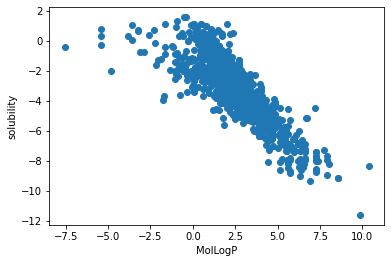

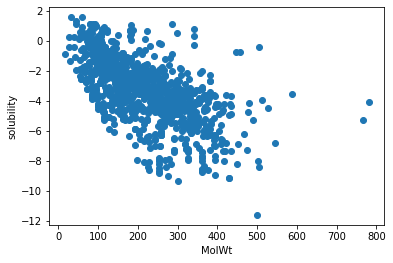

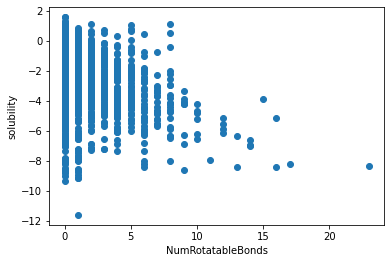

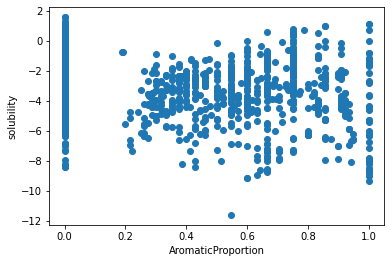

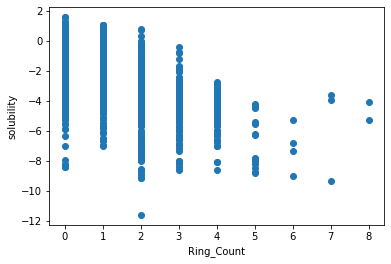

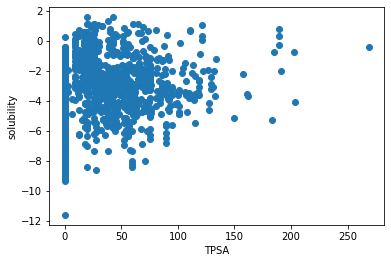

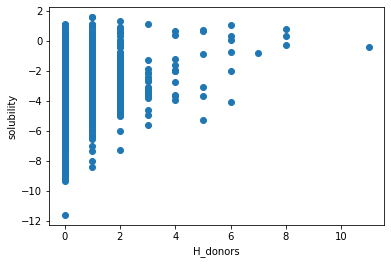

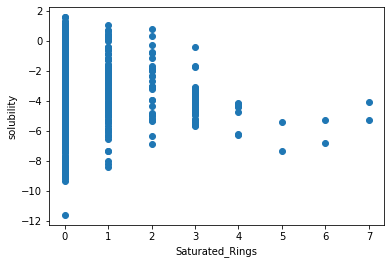

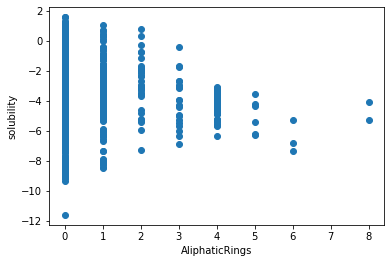

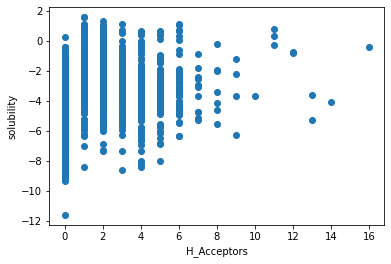

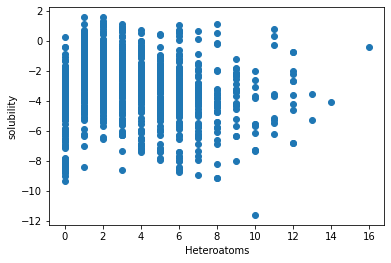

In [37]:
X_np = np.array(X)
y_np = np.array(Y)
for i in range(11):
    plt.figure()
    plt.scatter(X_np[:,i], y_np)
    plt.xlabel(columnNames[i])
    plt.ylabel("solubility")
    plt.show()

In [18]:
####  data split ...

from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, Y, test_size=0.05, random_state=42)

In [73]:
order = [ 0,  1,  5, 10,  4,  2,  3,  9,  6,  8,  7]
num_features = 3
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(1086, 11)
(58, 11)
(58,)
(1086,)


In [74]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score


In [79]:
for num_features in range(1,12):
    model_lr = linear_model.LinearRegression()
    model_lr.fit(X_train[:,order[:num_features]], y_train)
    r2_train = r2_score(y_train, model_lr.predict(X_train[:,order[:num_features]]))
    r2_test = r2_score(y_test, model_lr.predict(X_test[:,order[:num_features]]))
    print("   ###   %i features"%(num_features))
    print("   ---   Train r2: %f"%(r2_train))
    print("   ---   Test r2:  %f"%(r2_test))



   ###   1 features
   ---   Train r2: 0.682875
   ---   Test r2:  0.736975
   ###   2 features
   ---   Train r2: 0.763794
   ---   Test r2:  0.795963
   ###   3 features
   ---   Train r2: 0.767355
   ---   Test r2:  0.793814
   ###   4 features
   ---   Train r2: 0.769942
   ---   Test r2:  0.795945
   ###   5 features
   ---   Train r2: 0.778394
   ---   Test r2:  0.783359
   ###   6 features
   ---   Train r2: 0.778731
   ---   Test r2:  0.783858
   ###   7 features
   ---   Train r2: 0.779368
   ---   Test r2:  0.776053
   ###   8 features
   ---   Train r2: 0.787952
   ---   Test r2:  0.789472
   ###   9 features
   ---   Train r2: 0.789345
   ---   Test r2:  0.790315
   ###   10 features
   ---   Train r2: 0.795997
   ---   Test r2:  0.791268
   ###   11 features
   ---   Train r2: 0.796119
   ---   Test r2:  0.791414


Train r2: 0.767355
Test r2:  0.793814


In [46]:
model_svr=SVR(kernel='rbf')
model_svr.fit(X_train, y_train)

SVR()

In [47]:
r2_train = r2_score(y_train, model_svr.predict(X_train))
r2_test = r2_score(y_test, model_svr.predict(X_test))
print("Train r2: %f"%(r2_train))
print("Test r2:  %f"%(r2_test))

Train r2: 0.690514
Test r2:  0.733970


In [81]:
for num_features in range(1,12):
    model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
    model_rf.fit(X_train[:,order[:num_features]], y_train)
    r2_train = r2_score(y_train, model_rf.predict(X_train[:,order[:num_features]]))
    r2_test = r2_score(y_test, model_rf.predict(X_test[:,order[:num_features]]))
    print("   ###   %i features"%(num_features))
    print("   ---   Train r2: %f"%(r2_train))
    print("   ---   Test r2:  %f"%(r2_test))
    importances = model_rf.feature_importances_
    feature_order = np.argsort(importances)
    print(feature_order[::-1])

   ###   1 features
   ---   Train r2: 0.956532
   ---   Test r2:  0.784857
[0]
   ###   2 features
   ---   Train r2: 0.976765
   ---   Test r2:  0.895664
[0 1]
   ###   3 features
   ---   Train r2: 0.978959
   ---   Test r2:  0.898377
[0 1 2]
   ###   4 features
   ---   Train r2: 0.980498
   ---   Test r2:  0.909575
[0 1 2 3]
   ###   5 features
   ---   Train r2: 0.980923
   ---   Test r2:  0.912910
[0 1 2 3 4]
   ###   6 features
   ---   Train r2: 0.981046
   ---   Test r2:  0.919792
[0 1 2 3 4 5]
   ###   7 features
   ---   Train r2: 0.981322
   ---   Test r2:  0.924560
[0 1 2 3 4 6 5]
   ###   8 features
   ---   Train r2: 0.981406
   ---   Test r2:  0.925934
[0 1 2 3 4 5 6 7]
   ###   9 features
   ---   Train r2: 0.981283
   ---   Test r2:  0.928723
[0 1 2 3 4 6 5 7 8]
   ###   10 features
   ---   Train r2: 0.981380
   ---   Test r2:  0.929416
[0 1 2 3 4 5 6 7 8 9]
   ###   11 features
   ---   Train r2: 0.981399
   ---   Test r2:  0.929663
[ 0  1  2  3  4  5  6  7  8  9 1

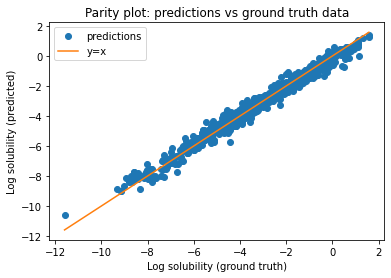

In [20]:
import matplotlib.pyplot as plt
preds = model_rf.predict(X_train)
x_y_line = np.linspace(min(y_train.flatten()), max(y_train.flatten()), 500)
plt.plot(y_train.flatten(), preds.flatten(), 'o', label='predictions')
plt.plot(x_y_line, x_y_line, label='y=x')
plt.xlabel("Log solubility (ground truth)")
plt.ylabel("Log solubility (predicted)")
plt.title("Parity plot: predictions vs ground truth data")
plt.legend()

In [59]:
from xgboost import XGBRegressor
model_xgr = XGBRegressor(n_estimators = 100, random_state = 0)
model_xgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
r2_train = r2_score(y_train, model_xgr.predict(X_train))
r2_test = r2_score(y_test, model_xgr.predict(X_test))
print("Train r2: %f"%(r2_train))
print("Test r2:  %f"%(r2_test))

Train r2: 0.993903
Test r2:  0.912607


In [26]:
Y_pred_test_xgr = model_xgr.predict(X_test)

In [23]:
Y_pred_test_rf = model_rf.predict(X_test)
#res = "\n".join("{} {}".format(x, y) for x, y in zip(y_test,Y_pred_test_rf ))
#print(res)

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, Y_pred_test_rf)

0.9269270505484866

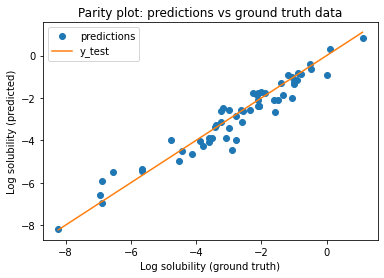

In [29]:
import matplotlib.pyplot as plt
preds = model_rf.predict(X_test)
x_y_line = np.linspace(min(y_test.flatten()), max(y_test.flatten()), 500)
plt.plot(y_test.flatten(), preds.flatten(), 'o', label='predictions')
plt.plot(x_y_line, x_y_line, label='y_test')
plt.xlabel("Log solubility (ground truth)")
plt.ylabel("Log solubility (predicted)")
plt.title("Parity plot: predictions vs ground truth data")
plt.legend()

In [31]:
import pickle
#### Save the model :::::
filename = 'finalized_model.rf'
pickle.dump(model_rf, open('/content/drive/MyDrive/finalized_model.rf', 'wb'))
 



In [32]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open('/content/drive/MyDrive/finalized_model.rf', 'rb'))
Y_pred_test_rf = loaded_model.predict(X_test)
result = r2_score(y_test, Y_pred_test_rf)
print(result)

0.9269270505484866


In [33]:
elem=input("Enter smiles get solubility ")
#elem='CCc1ccccc1C'
#moldata = []
#for elem in smiles:
mol = Chem.MolFromSmiles(elem)
#moldata.append(mol)

#    baseData = np.arange(1, 1)
#    i = 0
#    for mol in moldata:

desc_MolLogP = Crippen.MolLogP(mol)
desc_MolWt = Descriptors.MolWt(mol)
desc_NumRotatableBonds = Lipinski.NumRotatableBonds(mol)
desc_AromaticProportion = getAromaticProportion(mol)
desc_Ringcount        =   Descriptors.RingCount(mol)
desc_TPSA = Descriptors.TPSA(mol)
desc_Hdonrs=Lipinski.NumHDonors(mol)
desc_SaturatedRings = Lipinski.NumSaturatedRings(mol)   
desc_AliphaticRings = Lipinski.NumAliphaticRings(mol) 
desc_HAcceptors = Lipinski.NumHAcceptors(mol)
desc_Heteroatoms = Lipinski.NumHeteroatoms(mol)
#desc_molMR=Descriptors.MolMR(mol)
row = np.array([desc_MolLogP,desc_MolWt,desc_NumRotatableBonds,desc_AromaticProportion,desc_Ringcount,desc_TPSA,desc_Hdonrs,desc_SaturatedRings,desc_AliphaticRings,desc_HAcceptors,desc_Heteroatoms])
                     #   
                     #   
                     #   )

        #if i == 0:
baseData = row
        #else:
baseData = np.vstack([row])
#i = i + 1

columnNames = ["MolLogP", "MolWt", "NumRotatableBonds", "AromaticProportion","Ring_Count","TPSA","H_donors","Saturated_Rings","AliphaticRings","H_Acceptors","Heteroatoms"]
descriptors = pd.DataFrame(data=baseData, columns=columnNames)
descriptors =np.array(descriptors) 
preds=loaded_model.predict(descriptors)
#predict_test_input = smiles_to_onehots(['elem'], charset, max_smiles_chars)
#loaded_model1 = load_model("/content/drive/MyDrive/solubility_model_8858.hdf5")
#solubility_prediction = loaded_model.predict(predict_test_input)
print(preds)
#print(solubility_prediction)
#print(type(descriptors))    


Enter smiles get solubility Cc1cccc(C=C)c1
[-3.32955893]
